Pour le 7 novembre il vous est demandé de : 
1)	 lire les références pour avoir une idée du contexte général.
Sur les deux bases de données
2)	 Effectuer les analyses exploratoires simples (univariées, bivariées) 
3)	Compléter les données manquantes en utilisant différentes méthodes
4)	Effectuer des analyses exploratoires multivariées (clustering en utilisant éventuellement différentes méthodes). On fera également un clustering sur les deux bases réunies. 
5)	Comparer les partitions
6)	Rédiger un mini rapport de 3 pages au maximum sur le travail réalisé. Une attention particulière sera portée à la rédaction et à l’interprétation des résultats. 

- Clustering et on input par la valeur de la classe → OK
- Régression stochastique
- MICE
- Arbres de décision

Imputation multiple

Créer un jeu de validation/test avec des données complètes pour vérifier que la distribution est similaire

Tableau étude statistique

- Univariée
- Bivariée
- ACP
- Clustering

Comparaison des partitions, indice de rand

In [162]:
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

On importe les données depuis le fichier excel

In [163]:
df = pd.read_excel('Data Etude de Cas.xlsx', sheet_name=None)

In [164]:
Data1 = df['Global HPLC Data']
Data2 = df['Tara Data Phyto + HPLC']

In [165]:
NomsVariables = ['Chlorophyll a, total', 'Chlorophyll b', '19-Hexanoyloxyfucoxanthin', '19-Butanoyloxyfucoxanthin', 'Fucoxanthin', 'Peridinin', 'Alloxanthin', 'Zeaxanthin']

In [166]:
#pp.ProfileReport(Data1)

In [167]:
#pp.ProfileReport(Data2)

In [168]:
Data1 = Data1.drop(['Divinyl chlorophyll a'], axis=1)
Data1 = Data1.drop(['Divinyl chlorophyll b'], axis=1)
Data1 = Data1.drop(['Lat'], axis=1)
Data1 = Data1.drop(['Long'], axis=1)
Data1 = Data1.drop(['Month'], axis=1)
Data1 = Data1.drop(['Day'], axis=1)
Data1 = Data1.drop(['Year'], axis=1)

In [169]:
Data2 = Data2.drop(['Divinyl chlorophyll a'], axis=1)
Data2 = Data2.drop(['Divinyl chlorophyll b'], axis=1)
Data2 = Data2.drop(['Latitude'], axis=1)
Data2 = Data2.drop(['Longitude'], axis=1)
Data2 = Data2.drop(['Month'], axis=1)
Data2 = Data2.drop(['Day'], axis=1)
Data2 = Data2.drop(['Year'], axis=1)
Data2.rename(columns={'Unnamed: 0':'id'}, inplace=True)
Data2 = Data2.drop(['id'], axis=1)

In [170]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10, weights="uniform")
Data1Filled = pd.DataFrame(imputer.fit_transform(Data1))

In [171]:
#pp.ProfileReport(Data1)

In [172]:
#pp.ProfileReport(Data1Filled)

In [173]:
# Fonction de comptage des individus de la base de données avec au moins 1 valeur manquante sur la ligne
def comptage_lignes_avec_valeur_manquantes(Data):
    c=0
    for index, row in Data.iterrows():
        for i in range(len(row)):
            if np.isnan(row[i]):
                c+=1
                break
    print("Nombre d'observations avec au moins une valeur manquante :", c)
    print("Nombre d'observations sans aucune valeur manquante :", len(Data) - c)

In [174]:
comptage_lignes_avec_valeur_manquantes(Data1)

Nombre d'observations avec au moins une valeur manquante : 3110
Nombre d'observations sans aucune valeur manquante : 6374


Création de Data1Clean, la partition du jeu de données avec uniquement les lignes sans valeur manquantes

In [175]:
Data1Clean = Data1
for index, row in Data1.iterrows():
    for i in range(len(row)):
        if np.isnan(row[i]):
            Data1Clean = Data1Clean.drop(index, 0)
            break

/var/folders/jj/1zt_b71s29x1n2s8gtcjkldh0000gn/T/ipykernel_21819/373807028.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Data1Clean = Data1Clean.drop(index, 0)
/var/folders/jj/1zt_b71s29x1n2s8gtcjkldh0000gn/T/ipykernel_21819/373807028.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Data1Clean = Data1Clean.drop(index, 0)
/var/folders/jj/1zt_b71s29x1n2s8gtcjkldh0000gn/T/ipykernel_21819/373807028.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Data1Clean = Data1Clean.drop(index, 0)
/var/folders/jj/1zt_b71s29x1n2s8gtcjkldh0000gn/T/ipykernel_21819/373807028.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Data1Clean = Data1Clean

In [176]:
comptage_lignes_avec_valeur_manquantes(Data1Clean)

Nombre d'observations avec au moins une valeur manquante : 0
Nombre d'observations sans aucune valeur manquante : 6374


On renomme les colonnes des dataframes pour plot plus facilement

In [177]:
Data1.columns=pd.RangeIndex(8)
Data1Clean.columns=pd.RangeIndex(8)

Comparaison des distributions entre les valeurs imputées et les valeurs présentes dans le dataset

1. a. Boxplot sans outlier

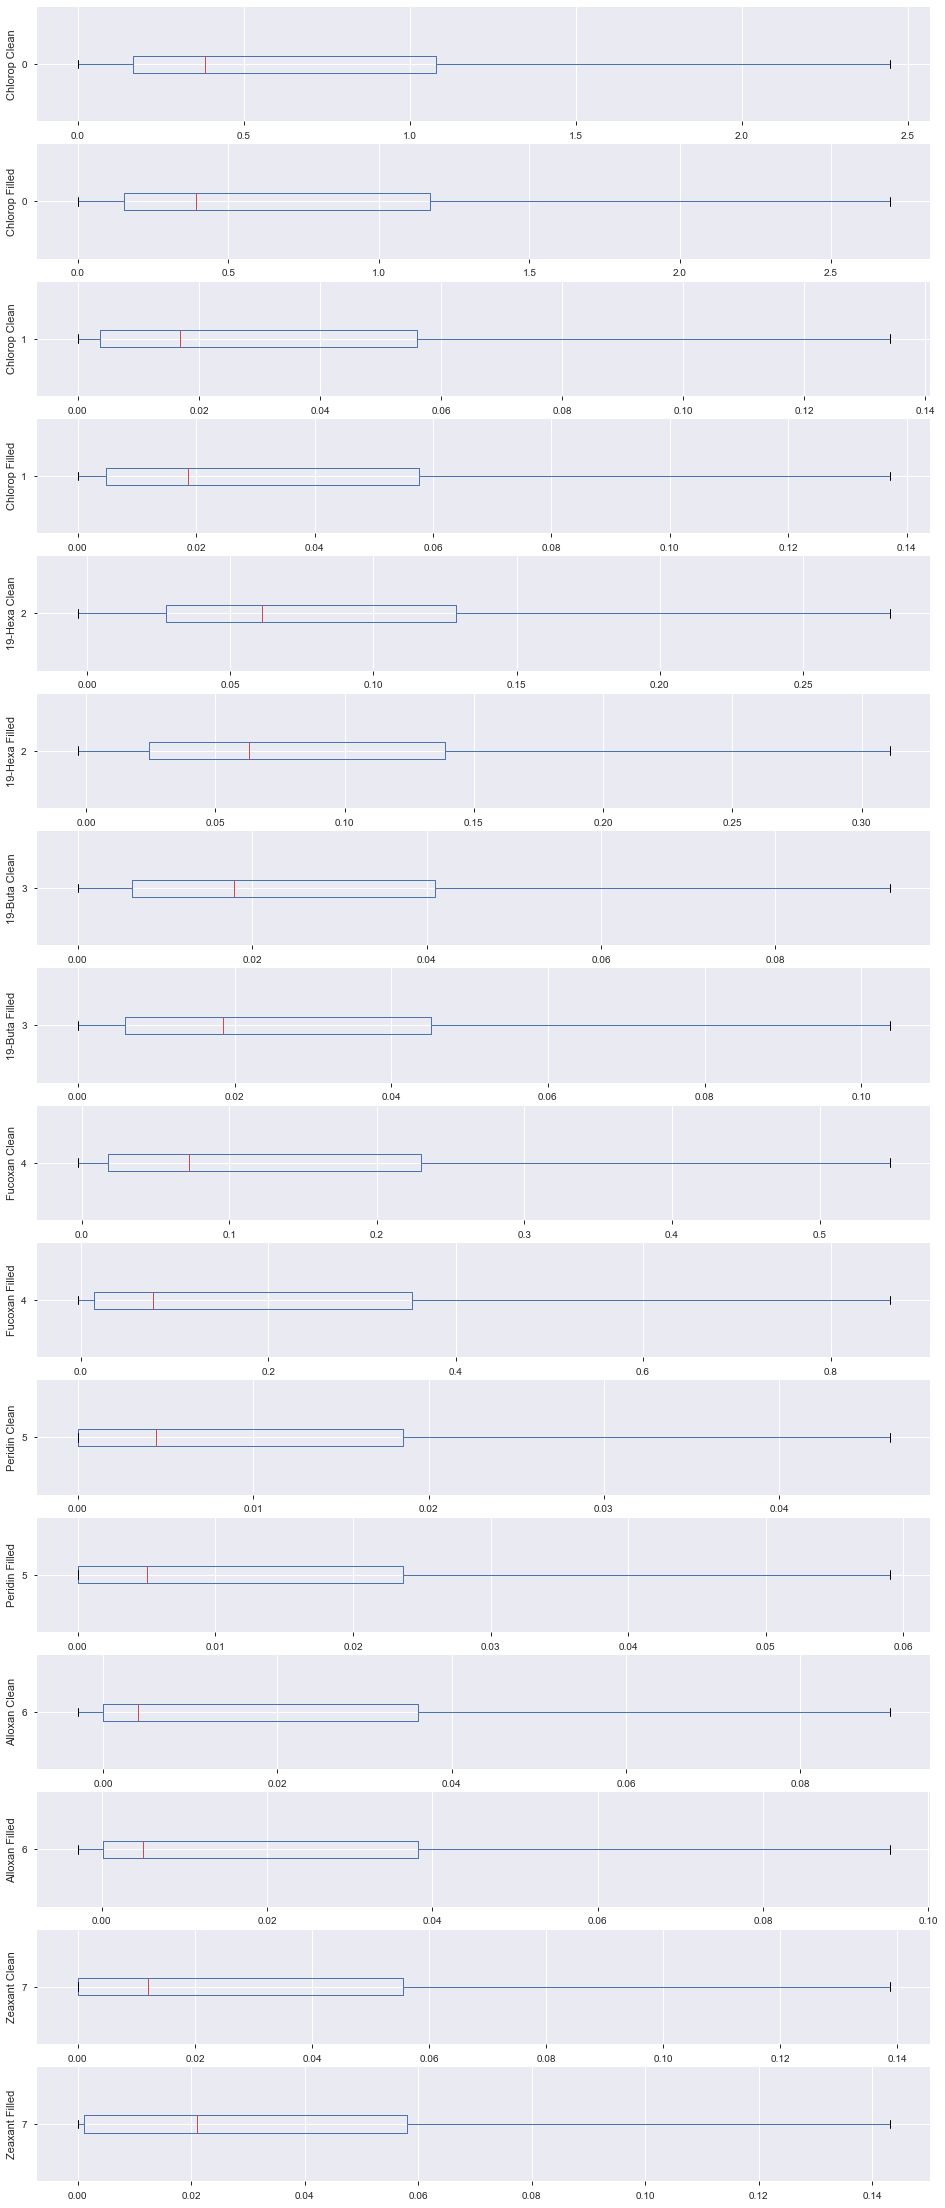

In [178]:
fig = plt.subplots(16,1,figsize=(16,40))
for i in range(8):
    plt.subplot(16,1,2*i+1)
    Data1Clean[[i]].boxplot(vert=False, sym='')
    plt.ylabel(NomsVariables[i][:7] + ' Clean')
    plt.subplot(16,1,2*i+2)
    Data1Filled[[i]].boxplot(vert=False, sym='')
    plt.ylabel(NomsVariables[i][:7] + ' Filled')

1. b. Boxplot avec outliers

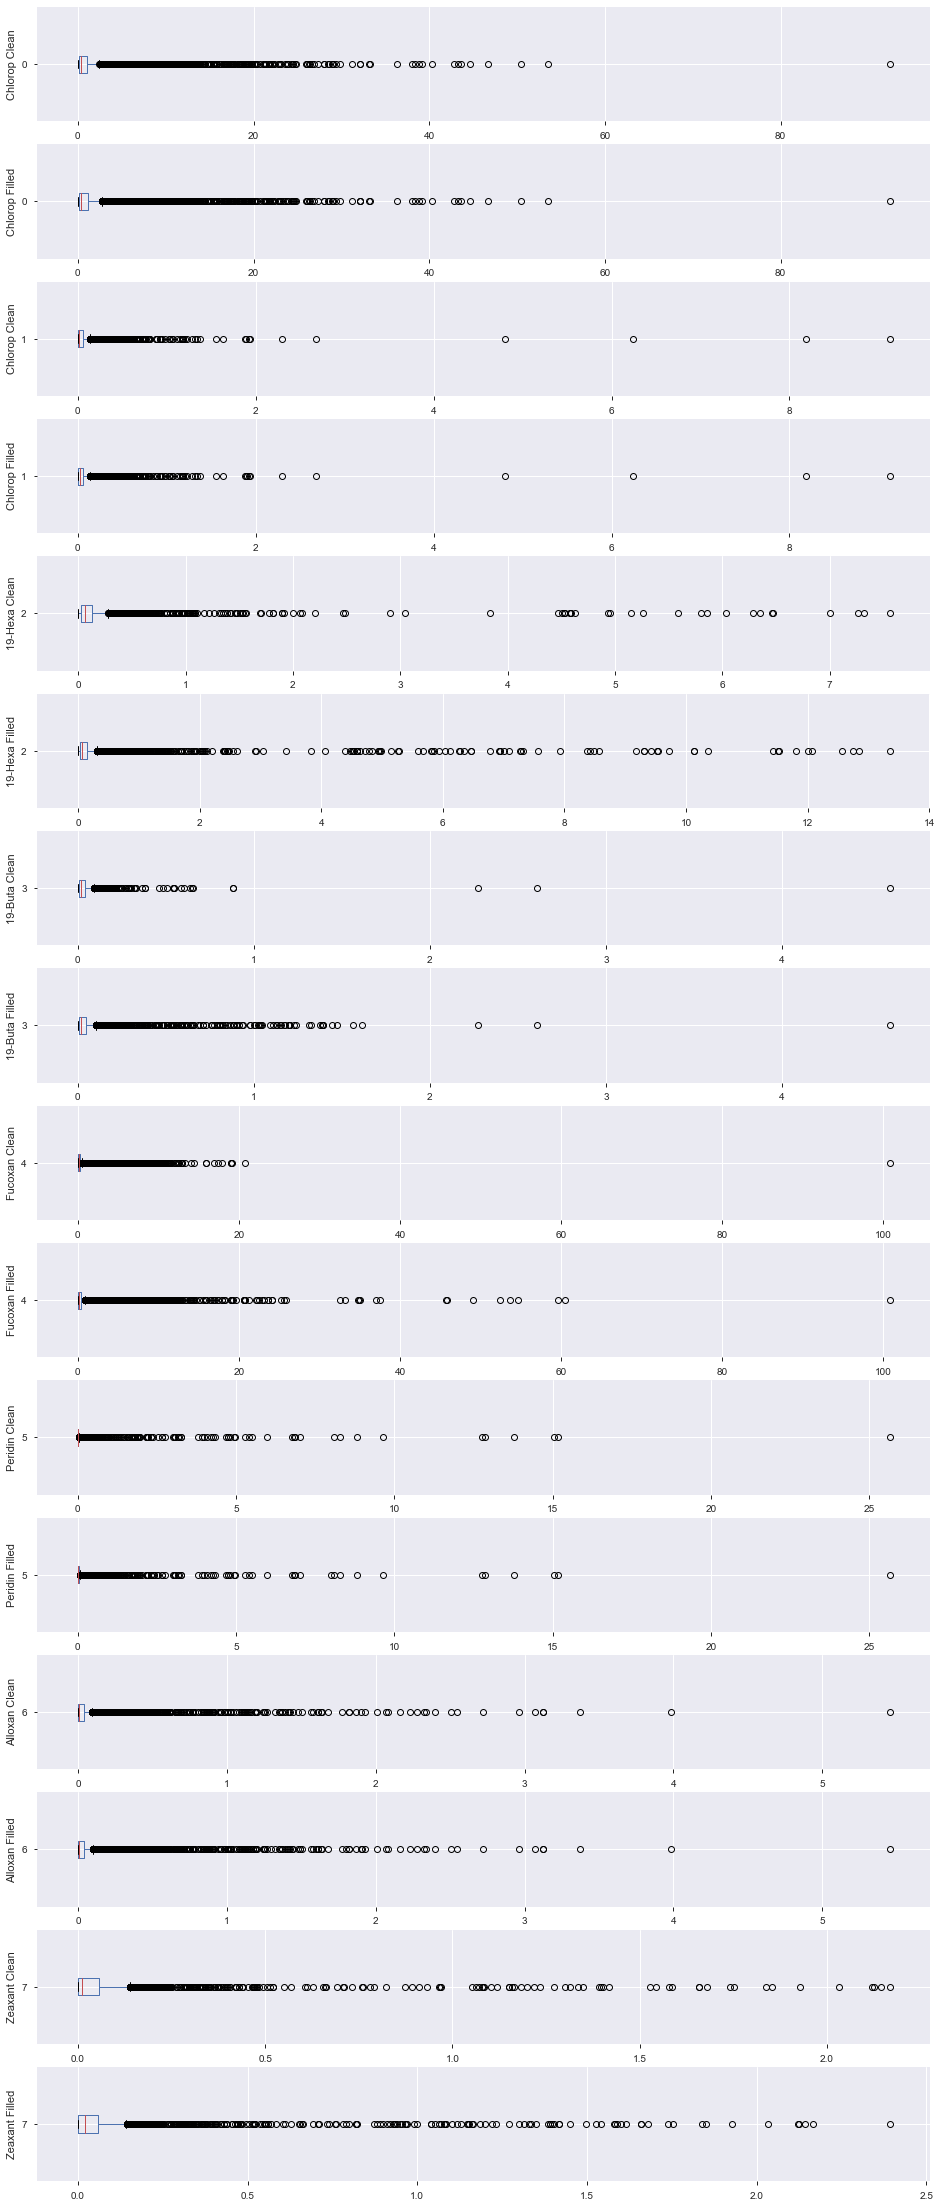

In [179]:
fig = plt.subplots(16,1,figsize=(16,40))
for i in range(8):
    plt.subplot(16,1,2*i+1)
    Data1Clean[[i]].boxplot(vert=False)
    plt.ylabel(NomsVariables[i][:7] + ' Clean')
    plt.subplot(16,1,2*i+2)
    Data1Filled[[i]].boxplot(vert=False)
    plt.ylabel(NomsVariables[i][:7] + ' Filled')

2. Histogrammes

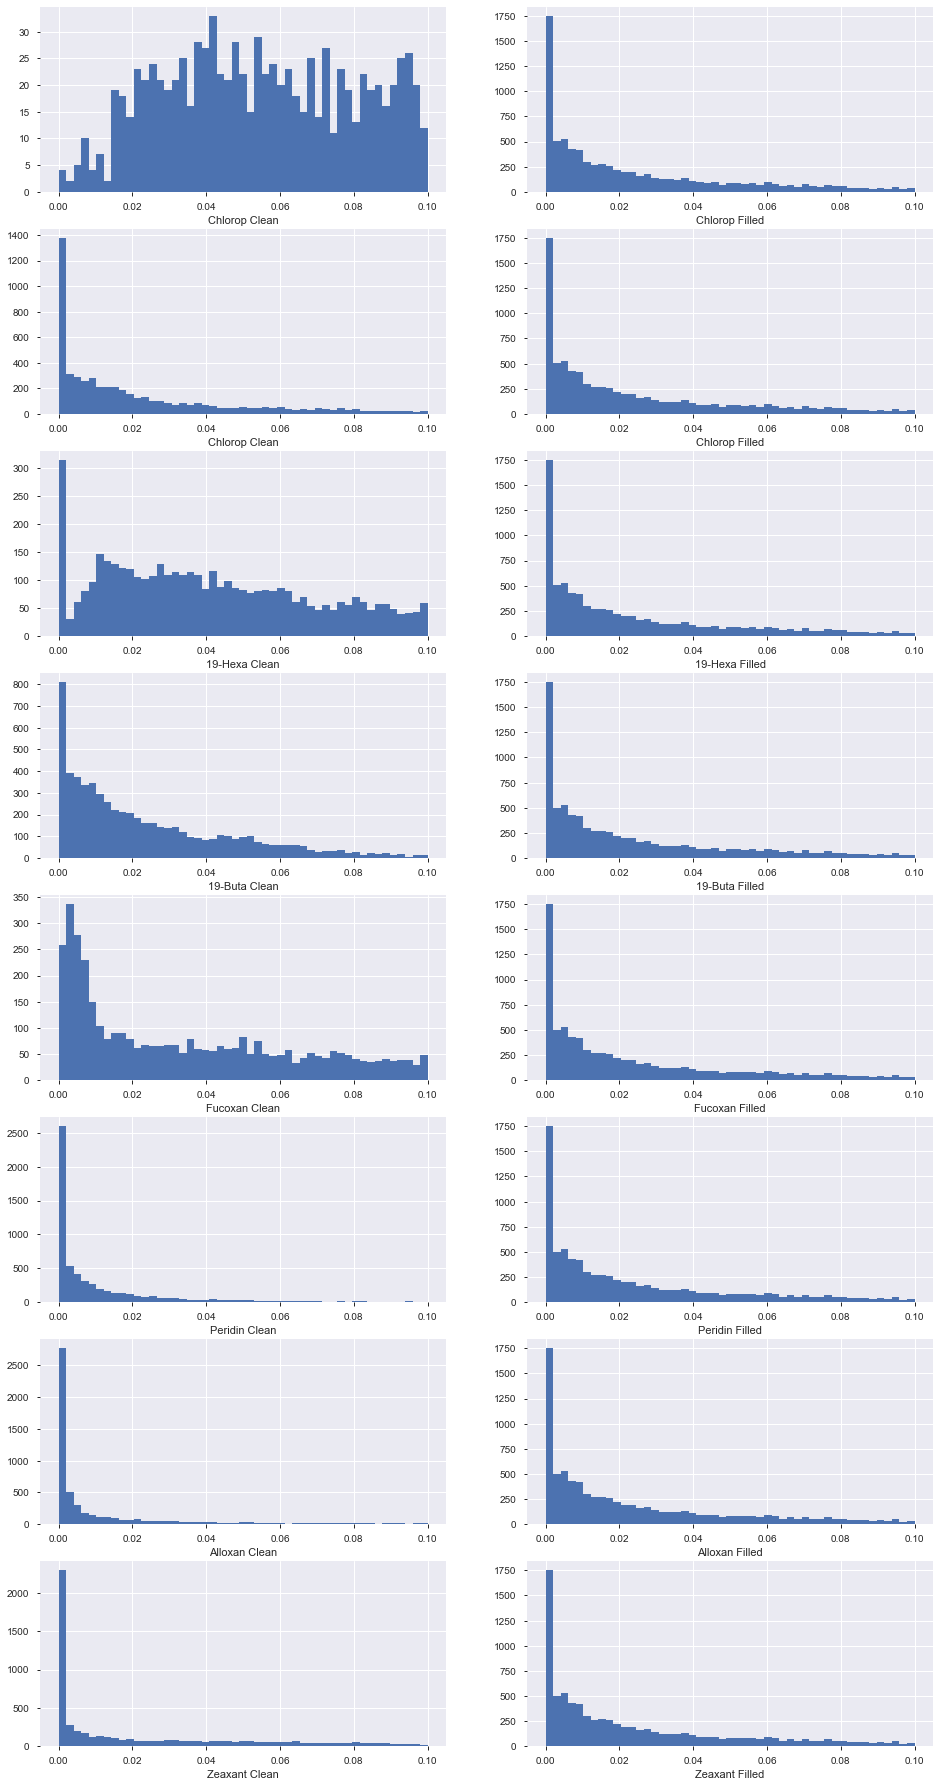

In [180]:
plt.style.use('seaborn-deep')
bins = np.linspace(0, 0.1)
#bins = np.linspace(0.1, 1)
#bins = np.linspace(1, 5)
#bins = np.linspace(5, 20)
fig = plt.subplots(8,2,figsize=(16,32))
for i in range(8):
    plt.subplot(8,2,2*i+1)
    plt.hist(Data1Clean[[i]], bins)
    plt.xlabel(NomsVariables[i][:7] + ' Clean')
    plt.subplot(8,2,2*i+2)
    plt.hist(Data1Filled[[1]], bins)
    plt.xlabel(NomsVariables[i][:7] + ' Filled')

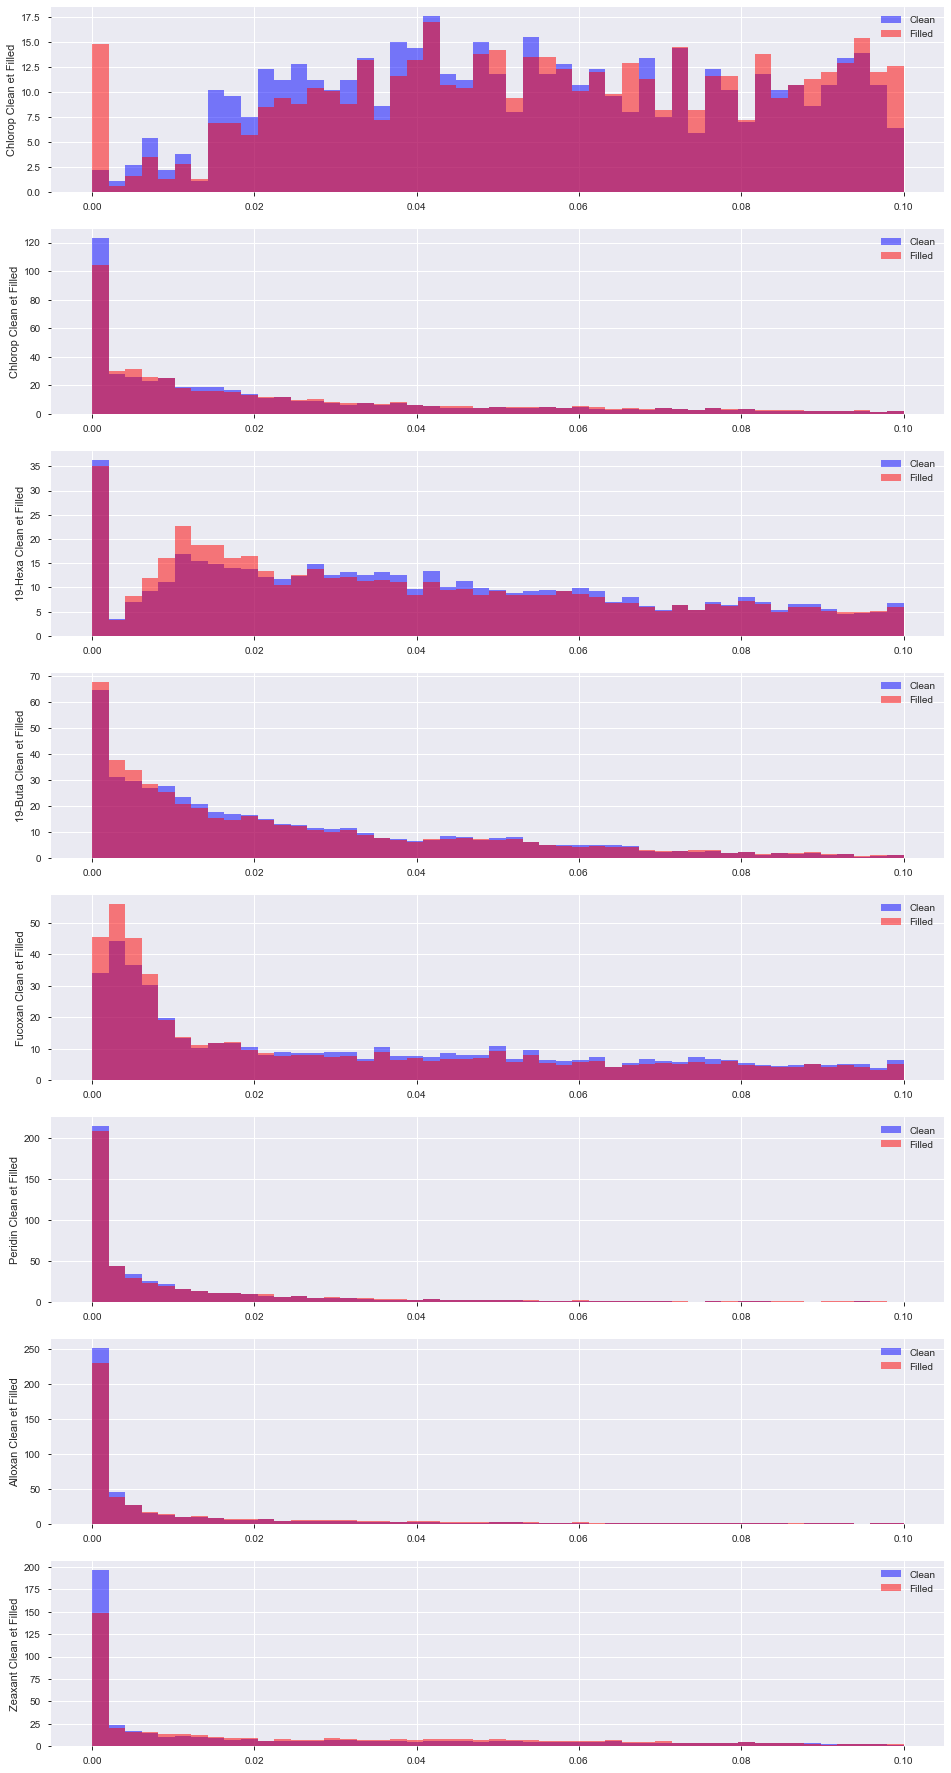

In [181]:
bins = np.linspace(0, 0.1)
#bins = np.linspace(0.1, 1)
#bins = np.linspace(1, 5)
#bins = np.linspace(5, 20)
fig = plt.subplots(8,1,figsize=(16,32))
for i in range(8):
    plt.subplot(8,1,i+1)
    plt.hist(Data1Clean[[i]], bins, alpha=0.5, label='Clean', color='b', density=True)
    plt.hist(Data1Filled[[i]], bins, alpha=0.5, label='Filled', color='r', density=True)
    plt.ylabel(NomsVariables[i][:7] + ' Clean et Filled')
    plt.legend(loc='upper right')

3. Heatmaps

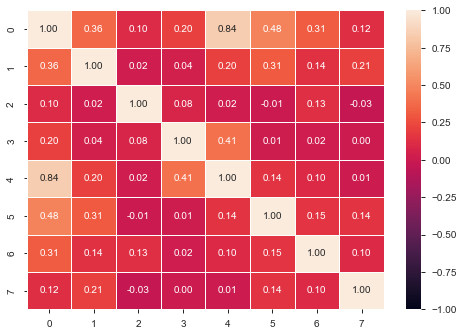

In [182]:
ax = sns.heatmap(Data1Clean.corr(), annot=True, fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.show()

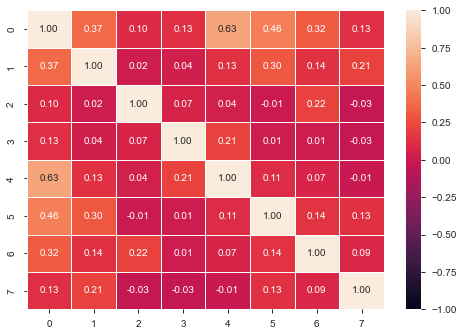

In [183]:
ax = sns.heatmap(Data1Filled.corr(), annot=True, fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.show()

ITERATIVE IMPUTER

In [184]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [185]:
imp=IterativeImputer(max_iter=10, random_state=0)
imp.fit_transform(Data1)
Data2Filled=pd.DataFrame(imp.fit_transform(Data1))

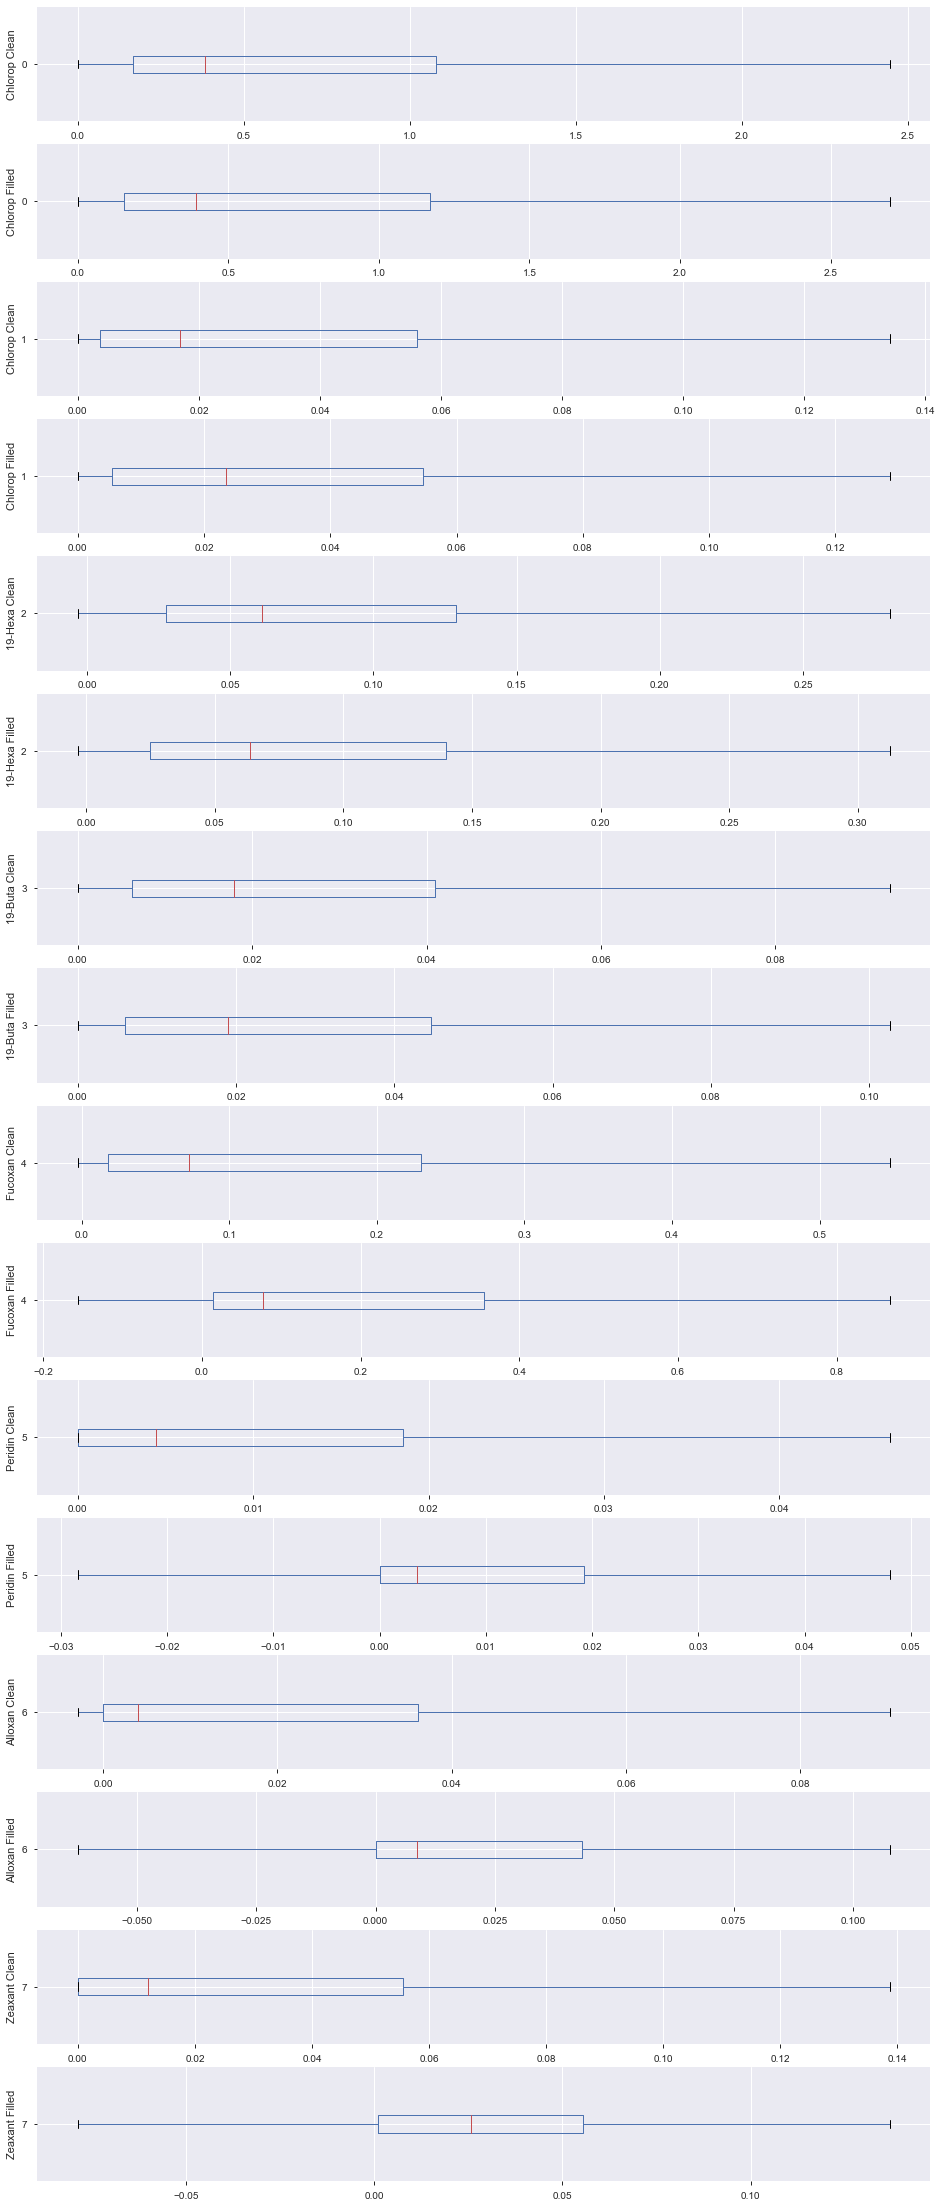

In [186]:
fig = plt.subplots(16,1,figsize=(16,40))
for i in range(8):
    plt.subplot(16,1,2*i+1)
    Data1Clean[[i]].boxplot(vert=False, sym='')
    plt.ylabel(NomsVariables[i][:7] + ' Clean')
    plt.subplot(16,1,2*i+2)
    Data2Filled[[i]].boxplot(vert=False, sym='')
    plt.ylabel(NomsVariables[i][:7] + ' Filled')

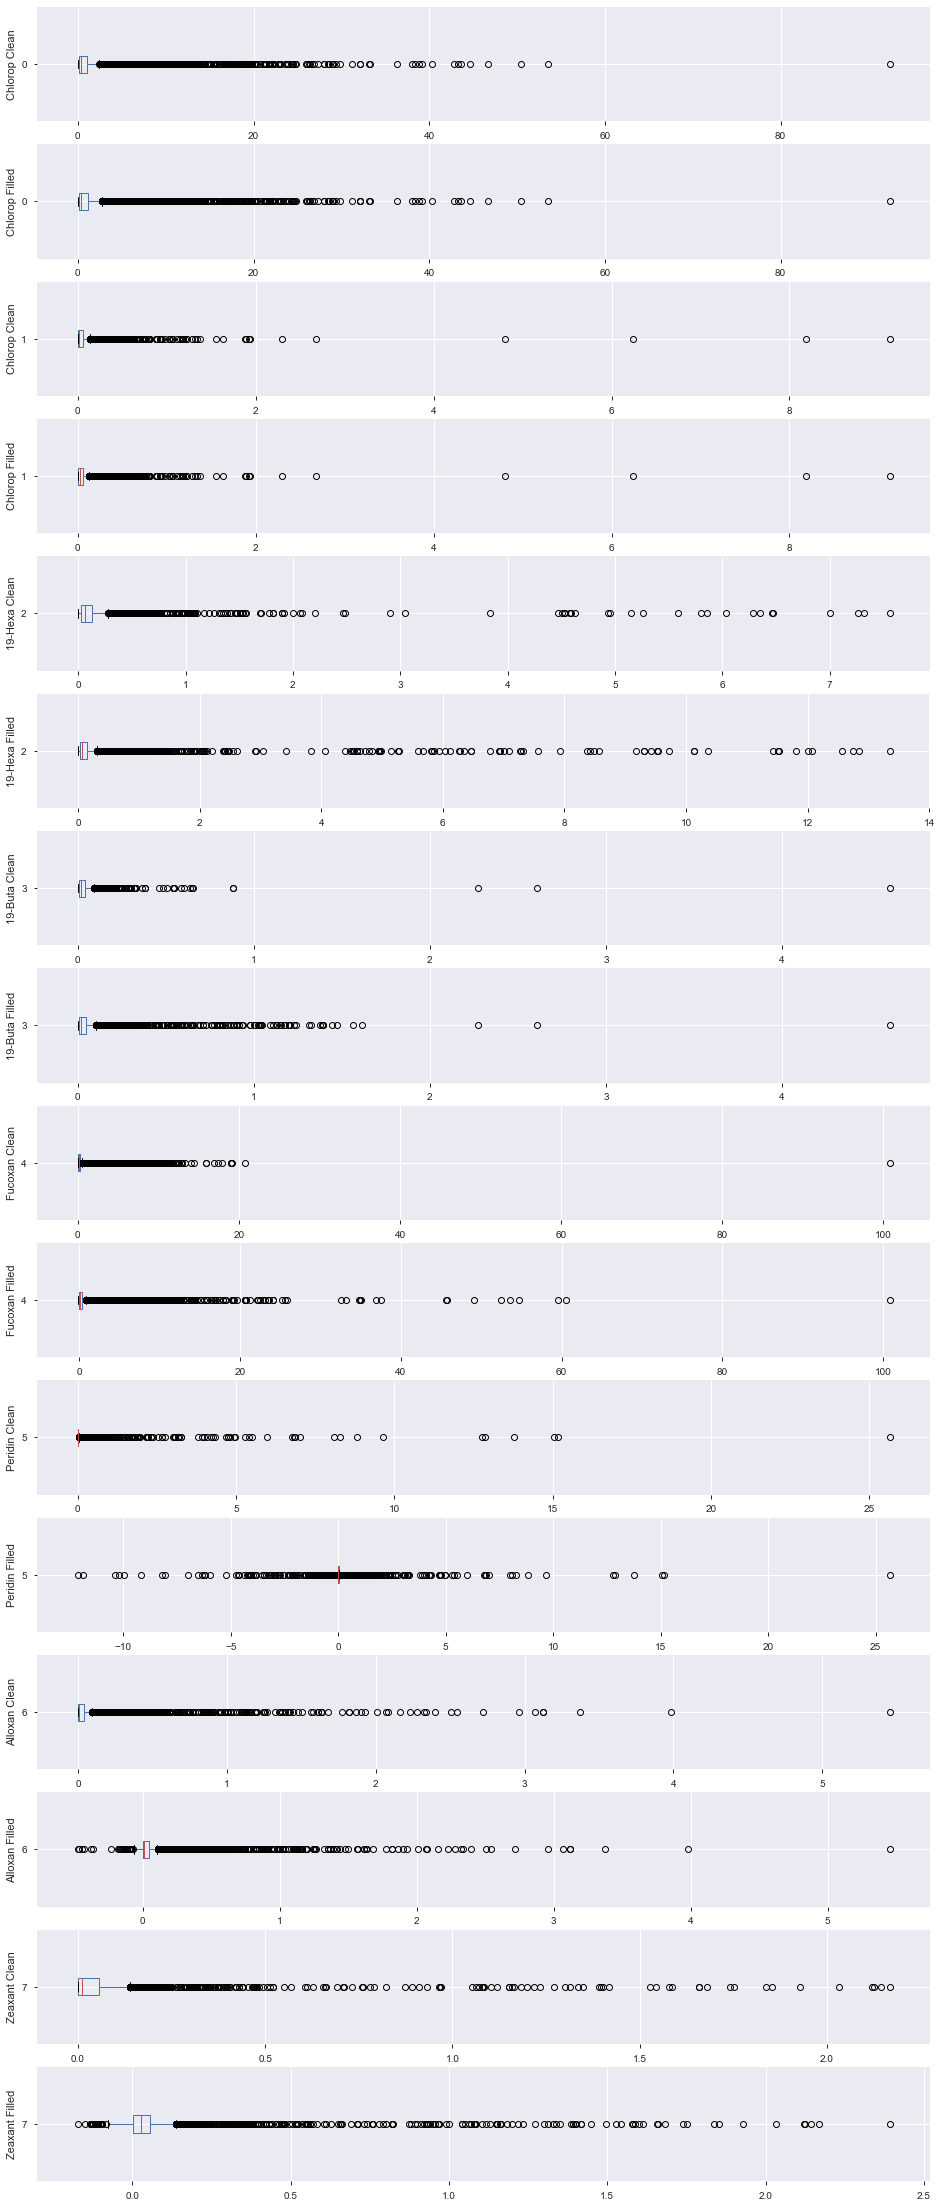

In [187]:
fig = plt.subplots(16,1,figsize=(16,40))
for i in range(8):
    plt.subplot(16,1,2*i+1)
    Data1Clean[[i]].boxplot(vert=False)
    plt.ylabel(NomsVariables[i][:7] + ' Clean')
    plt.subplot(16,1,2*i+2)
    Data2Filled[[i]].boxplot(vert=False)
    plt.ylabel(NomsVariables[i][:7] + ' Filled')

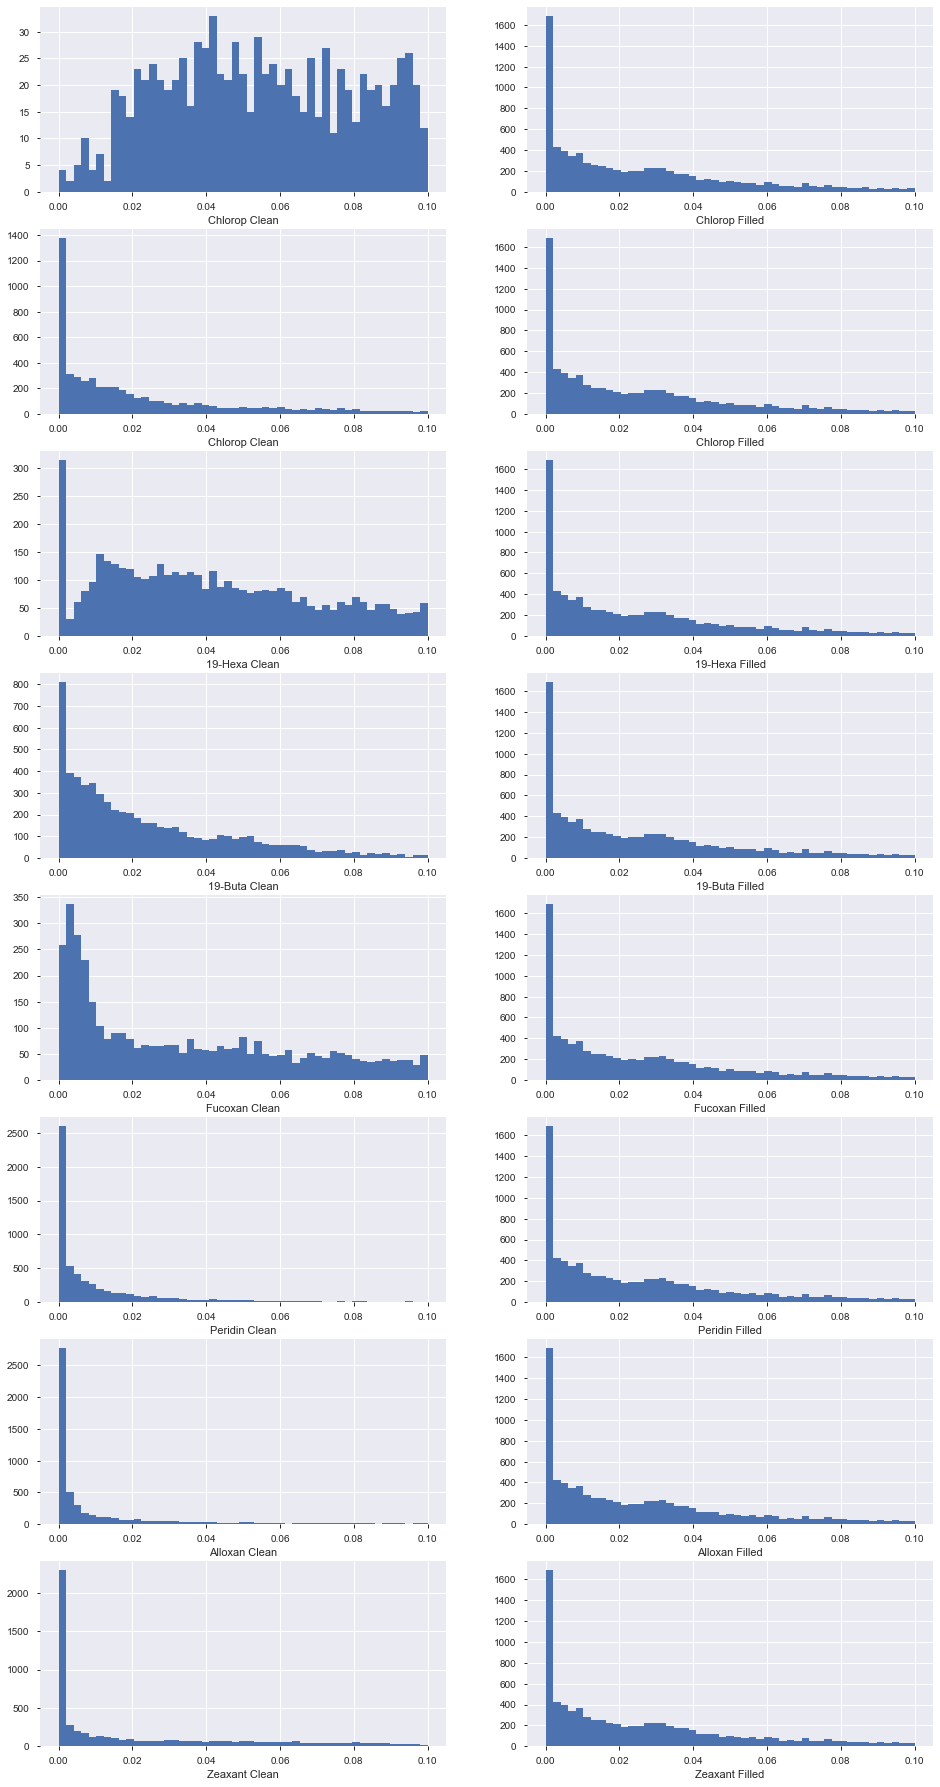

In [188]:
plt.style.use('seaborn-deep')
bins = np.linspace(0, 0.1)
#bins = np.linspace(0.1, 1)
#bins = np.linspace(1, 5)
#bins = np.linspace(5, 20)
fig = plt.subplots(8,2,figsize=(16,32))
for i in range(8):
    plt.subplot(8,2,2*i+1)
    plt.hist(Data1Clean[[i]], bins)
    plt.xlabel(NomsVariables[i][:7] + ' Clean')
    plt.subplot(8,2,2*i+2)
    plt.hist(Data2Filled[[1]], bins)
    plt.xlabel(NomsVariables[i][:7] + ' Filled')

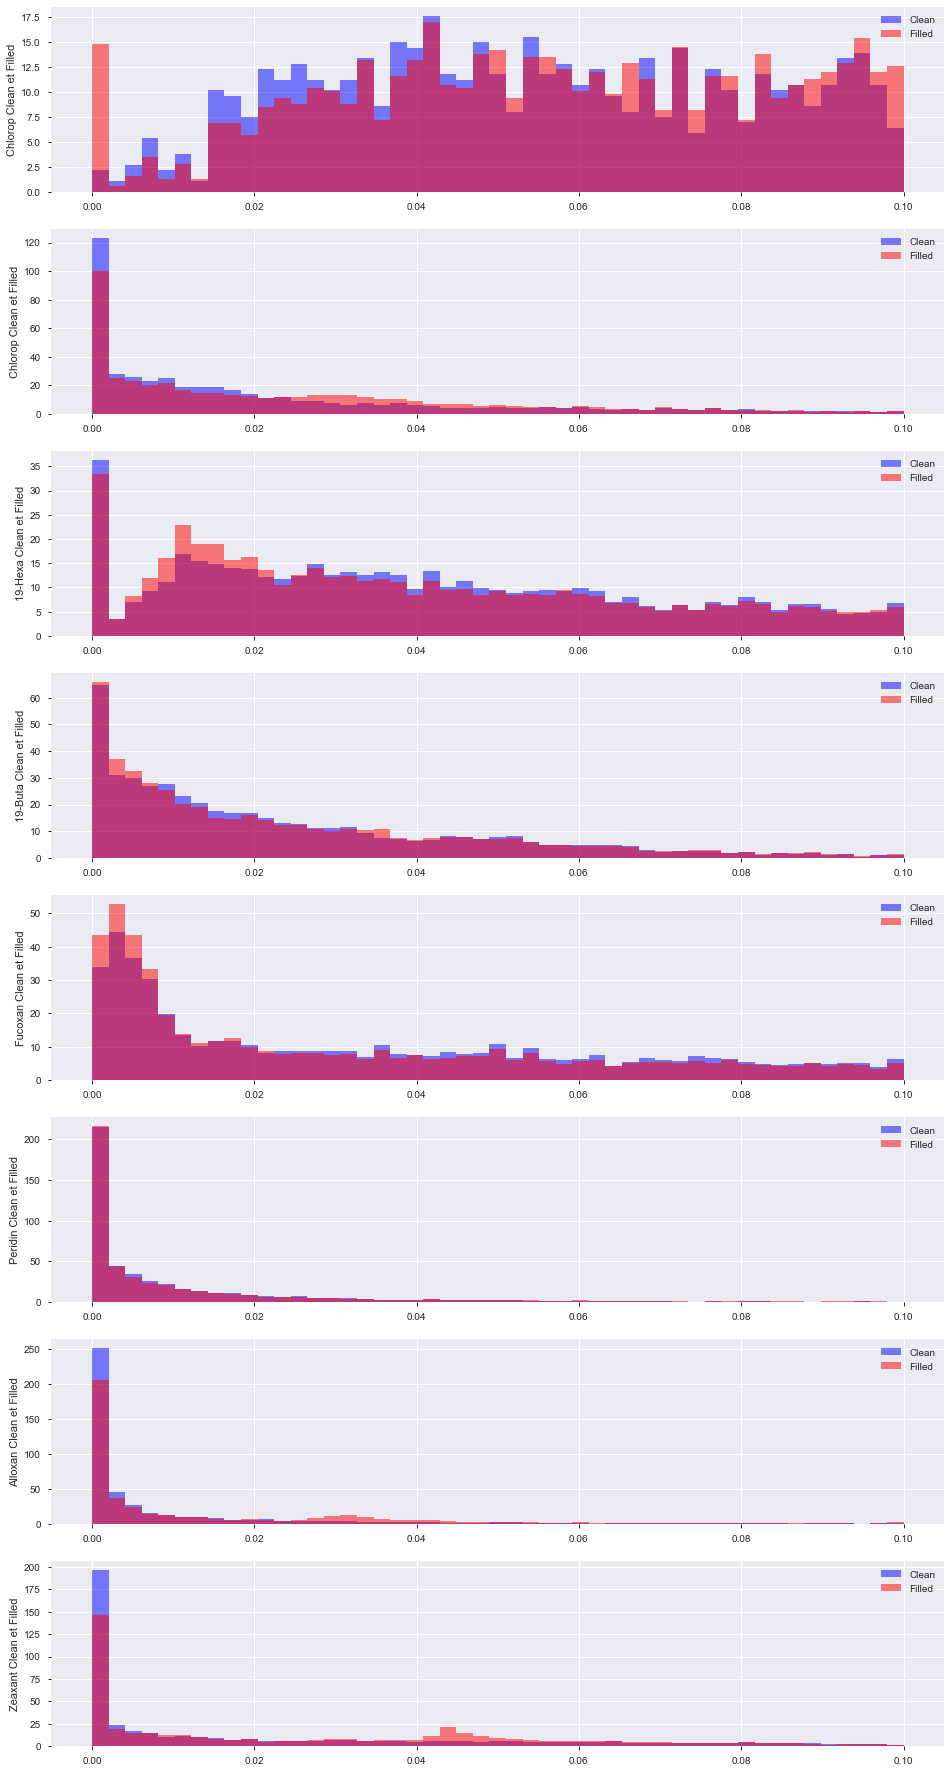

In [189]:
bins = np.linspace(0, 0.1)
#bins = np.linspace(0.1, 1)
#bins = np.linspace(1, 5)
#bins = np.linspace(5, 20)
fig = plt.subplots(8,1,figsize=(16,32))
for i in range(8):
    plt.subplot(8,1,i+1)
    plt.hist(Data1Clean[[i]], bins, alpha=0.5, label='Clean', color='b', density=True)
    plt.hist(Data2Filled[[i]], bins, alpha=0.5, label='Filled', color='r', density=True)
    plt.ylabel(NomsVariables[i][:7] + ' Clean et Filled')
    plt.legend(loc='upper right')

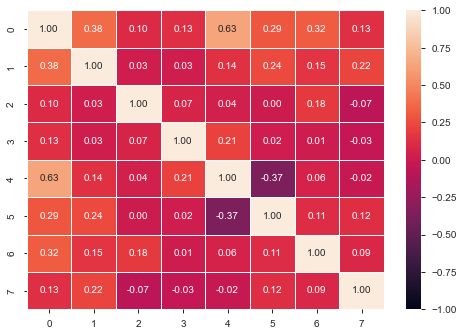

In [190]:
ax = sns.heatmap(Data2Filled.corr(), annot=True, fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.show()

In [191]:
Data2Filled.describe()-Data1Filled.describe()

,0,1,2,3,4,5,6,7
count,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean,0.0,0.000205,0.000279,-0.000161,-0.001064,-0.042257,-0.001508,0.000148
std,0.0,-0.001693,-0.000353,-0.000538,0.000189,0.141885,-0.011319,0.000088
min,0.0,0.000000,0.000000,0.000000,-0.153510,-12.118369,-0.470494,-0.172405
25%,0.0,0.000700,0.000690,0.000040,0.000094,0.000000,0.000000,-0.000149
50%,0.0,0.004890,0.000780,0.000500,-0.000150,-0.001499,0.003608,0.004813
75%,0.0,-0.002986,0.001099,-0.000457,0.001588,-0.004407,0.005000,-0.002576
max,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [192]:
Data1Clean.describe()-Data1Filled.describe()

,0,1,2,3,4,5,6,7
count,-3110.000000,-3110.000000,-3110.000000,-3110.000000,-3110.000000,-3110.000000,-3110.000000,-3110.000000
mean,0.156751,0.005272,-0.050219,-0.011449,-0.204531,0.008628,0.007007,-0.001899
std,0.505550,0.035618,-0.305599,-0.031764,-0.807368,0.104203,0.024903,0.004957
min,0.000000,0.000000,0.000000,0.000000,0.000600,0.000000,0.000000,0.000000
25%,0.013750,-0.001100,0.003090,0.000282,0.004460,0.000000,-0.000100,-0.001149
50%,-0.007887,-0.001620,-0.001800,-0.000630,-0.004000,-0.000532,-0.001000,-0.008927
75%,-0.091195,-0.001706,-0.010226,-0.004100,-0.123462,-0.005071,-0.002100,-0.002525
max,0.000000,0.000000,-5.788127,0.000000,0.000000,0.000000,0.000000,-0.224300


Comparer avec une ligne

In [193]:
Data1.head(1)

,0,1,2,3,4,5,6,7
0,0.482,0.059,0.085,0.016,0.029,0.017,0.007,0.188


In [194]:
cp=Data1.copy()
cp

,0,1,2,3,4,5,6,7
0,0.48200,0.0590,0.08500,0.01600,0.02900,0.01700,0.00700,0.18800
1,1.24800,0.2770,0.24800,0.06100,0.33200,0.06400,0.10600,0.03900
2,1.51700,0.2060,0.23400,0.06500,0.63600,0.05600,0.20700,0.03000
3,3.36300,0.0000,0.13700,0.03500,2.05700,0.08500,0.00000,0.04800
4,1.32500,0.1920,0.28800,0.05300,0.33600,0.15200,0.03200,0.17400
...,...,...,...,...,...,...,...,...
9479,0.03400,0.0000,0.02120,0.00349,0.00621,0.00000,0.00000,0.01386
9480,0.05309,0.0000,0.00790,0.00000,0.00000,0.00000,0.00000,0.03607
9481,0.02809,0.0000,0.00703,0.00000,0.00000,0.00000,0.00000,0.04449
9482,0.16241,0.0000,0.03478,0.01144,0.02664,0.00000,0.00000,0.01462


In [195]:
#from numpy import NaN
#cp.iloc[0,:]= [NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN]
#cp

In [196]:
from sklearn.impute import KNNImputer
imput = KNNImputer(n_neighbors=10, weights="uniform")
cpFilled = pd.DataFrame(imput.fit_transform(cp))

In [197]:
#cpFilled.head(1)-Data1.head(1)

In [198]:
#cpFilled.head(1)

In [199]:
#Data1.head(1)

In [200]:
from numpy import NaN

In [201]:
test=[]
for i in range(len(Data1)):
 cp.iloc[i,:]= [NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN]
 imput = KNNImputer(n_neighbors=10, weights="uniform")
 cpFilled = pd.DataFrame(imput.fit_transform(cp))
 test.append(cpFilled.iloc[i,:]-Data1.iloc[i,:])
 
 

KeyboardInterrupt: 